In [0]:
import os
os.environ["JAVA_HOME"] = "/usr/lib/jvm/java-8-openjdk-amd64"
os.environ["SPARK_HOME"] = "/content/spark-2.4.5-bin-hadoop2.7"

In [0]:
import findspark
findspark.init()
from pyspark.sql import SparkSession
from pyspark import SparkContext

In [0]:
from pyspark import SparkContext
from pyspark.sql import SQLContext
from pyspark.sql.types import *
from pyspark.sql.functions import *

In [0]:
from pyspark import SparkContext
from pyspark.sql import SQLContext
from pyspark.sql import SparkSession
from pyspark.conf import SparkConf

In [0]:
sc = SparkContext()
spark = SparkSession(sc)
sqlContext = SQLContext(sc)

In [0]:
input_data="s3://nikhifinalproj6007/devicestatus.txt"

In [0]:
data = sc.textFile(input_data)
parts = data.map(lambda l: l.split("\t"))
# Each line is converted to a tuple.
final_data = parts.map(lambda p: (float(p[0]),float(p[1]),StringType(p[2]),StringType(p[3]),StringType(p[4]).strip()))
final_data =final_data.filter(lambda p: p[0]!=0 and p[1]!=0)

In [0]:

final_data.take(3)

[(33.6894754264, -117.543308253, '2014-03-15:10:10:20', 'Sorrento', 'F41L'),
 (37.4321088904, -121.485029632, '2014-03-15:10:10:20', 'MeeToo', '1.0'),
 (39.4378908349, -120.938978486, '2014-03-15:10:10:20', 'MeeToo', '1.0')]

In [0]:
output_bucket="s3://nikhifinalproj6007/final_data"

In [0]:
df.rdd.coalesce(1).saveAsTextFile(output_bucket)

In [0]:
sc.textFile(output_bucket).take(10)

["Row(latitude=33.689476013183594, longtitude=-117.54330444335938, date='2014-03-15 10:10:20', manufacturer='Sorrento', model_name='F41L')",
 "Row(latitude=37.43210983276367, longtitude=-121.48503112792969, date='2014-03-15 10:10:20', manufacturer='MeeToo', model_name='1.0')",
 "Row(latitude=39.437889099121094, longtitude=-120.93898010253906, date='2014-03-15 10:10:20', manufacturer='MeeToo', model_name='1.0')",
 "Row(latitude=39.36351776123047, longtitude=-119.40033721923828, date='2014-03-15 10:10:20', manufacturer='Sorrento', model_name='F41L')",
 "Row(latitude=33.19135665893555, longtitude=-116.4482421875, date='2014-03-15 10:10:20', manufacturer='Ronin', model_name='Novelty')",
 "Row(latitude=33.834354400634766, longtitude=-117.33000183105469, date='2014-03-15 10:10:20', manufacturer='Sorrento', model_name='F41L')",
 "Row(latitude=37.380393981933594, longtitude=-121.84075927734375, date='2014-03-15 10:10:20', manufacturer='Sorrento', model_name='F33L')",
 "Row(latitude=34.18410491

In [0]:
import pandas as pd
df = final_data.select("*").toPandas()

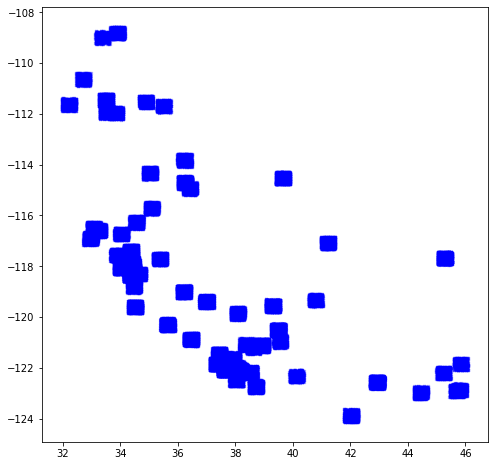

In [0]:
import matplotlib.pyplot as plt
from matplotlib.pyplot import figure
plt.scatter(df["latitude"],df["longitude"],alpha=.5,marker='o',s=.09)
plt.xlabel("latitude")
plt.ylabel("longitude")
plt.show()